In [1]:
import platform
print(platform.architecture())

('32bit', 'WindowsPE')


In [2]:
!python --version

Python 3.7.6


In [3]:
pwd

'C:\\Users\\USER\\Desktop\\Python_Basic\\자료2'

In [4]:
# 네이버에서 검색어 입력받아 검색 한 후 블로그 메뉴를 선택하고
# 오른쪽에 있는 검색옵션 버튼을 눌러서
# 정렬 방식과 기간을 입력하기

#Step 0. 필요한 모듈과 라이브러리를 로딩합니다.
import sys
import os
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup #정제
from selenium import webdriver
import time
import tqdm
from tqdm.notebook import tqdm

In [18]:
query_txt = input('1.크롤링할 키워드는 무엇입니까?: ')
# query_txt2 = input('2.제외할 첫번째 키워드를 입력하세요: ')
# query_txt3 = input('3.제외할 두번째 키워드를 입력하세요: '|)

start_date = input('4.조회를 시작할 날짜를 입력하세요(예:2017-01-01) :')
end_date = input('5.조회를 종료할 날짜를 입력하세요(예:2017-12-31): ')

1.크롤링할 키워드는 무엇입니까?: 여행
4.조회를 시작할 날짜를 입력하세요(예:2017-01-01) :20200101
5.조회를 종료할 날짜를 입력하세요(예:2017-12-31): 20200701


In [ ]:
query_txt="여행"
start_date="20200701"
end_date="20200720"

In [19]:
#Step 1. 크롬 웹브라우저 실행
path = "chromedriver.exe"   # 윈도우는 "chromedriver.exe"

driver = webdriver.Chrome(path)
# 사이트 주소는 네이버
driver.get('http://www.naver.com')
time.sleep(2)

#Step 2. 네이버 검색창에 "검색어" 검색
element = driver.find_element_by_id("query")
element.send_keys(query_txt)  # query_txt는 위에서 입력한 '여행'
element.submit() #검색 누름

#Step 3. "블로그" 카테고리 선택
driver.find_element_by_link_text("블로그").click( )    # .click() 괄호 안을 눌러라는 뜻

#Step 4. 오른쪽의 검색 옵션 버튼 클릭
driver.find_element_by_id("_search_option_btn").click( )

#Step 5. 정렬 : "관련도순" 
# 개발자 도구에서 정렬 버튼의 id 가 보이지 않습니다.
# 이럴 경우 쉽게 사용할 수 있는 방법이 바로 xpath 를 이용하는 방법입니다.
# xpath는 개발자 도구에서 해당 메뉴 부분을 마우스 오른쪽 버튼을 누르고 
# copy -> copy xpath 를 선택하면 됩니다
driver.find_element_by_xpath("""//*[@id="snb"]/div/ul/li[1]/a""").click( )  # 정렬 버튼의 xpath 클릭
driver.find_element_by_xpath("""//*[@id="snb"]/div/ul/li[1]/div/ul/li[1]/a""").click( ) # 관련도순 xpath

#Step 6. 날짜 입력
driver.find_element_by_xpath("""//*[@id="snb"]/div/ul/li[2]/a""").click()
time.sleep(2)

# 이 부분이 아주 중요합니다.
# 날짜 부분에 날짜를 입력할 때 입력 속도가 너무 빠를 경우 날짜가 입력이 되다가 
# 오타가 나오는 경우가 많습니다.
# 그래서 날짜를 입력할 때 for 반복문을 사용해서 1 글자씩 입력하도록 코딩했습니다.

# 시작 날짜 입력하기
s_date = driver.find_element_by_xpath("""//*[@id="blog_input_period_begin"]""")     
driver.find_element_by_xpath("""//*[@id="blog_input_period_begin"]""").click()
s_date.clear( )  # 날짜 입력 부분에 기존에 입력되어 있던 날짜를 제거합니다. 
time.sleep(1)
# 아래 코드가 날짜를 for 반복문으로 1 글자씩 입력하는 부분입니다.
for c in start_date:
    s_date.send_keys(c)
    time.sleep(0.1)
    
# 종료 날짜 입력하기
e_date = driver.find_element_by_xpath("""//*[@id="blog_input_period_end"]""")
driver.find_element_by_xpath("""//*[@id="blog_input_period_end"]""").click()
e_date.clear()
time.sleep(1)

for c in end_date:
    e_date.send_keys(c)
    time.sleep(0.1)
    
# Step7. 날짜 입력 "적용하기" 버튼을 클릭 합니다.  
driver.find_element_by_class_name("tx").click()
time.sleep(3)

# # Step 8. 상세 검색버튼을 클릭 후 제외할 단어들을 설정합니다.
# ele2 = driver.find_element_by_id("inpop3")
# ele2.send_keys(query_txt2)
# ele2.send_keys(',')
# ele2.send_keys(query_txt3)
# driver.find_element_by_css_selector(".btn_ft.ty_green._search").click( )

## 글 url 크롤링 시작

In [20]:
url_list = []
title_list = []

# ★몇개의 페이지를 크롤링할지 선택
total_page = 10
for i in tqdm(range(0, total_page)):  # 페이지 번호
    i = i*10 + 1 #블로그 구조!! 손대지말기
    url = "https://search.naver.com/search.naver\
?date_from={0}&date_option=8&date_to={1}\
&dup_remove=1&nso=p%3Afrom{2}to{3}post_blogurl=\
&post_blogurl_without=&query={4}&sm=tab_pge&srchby=all&st=sim&where=post&start={5}".format(start_date,end_date,start_date,end_date,query_txt, i)
    driver.get(url)
    time.sleep(0.5)
    
    # URL 크롤링 시작
    titles = "a.sh_blog_title._sp_each_url._sp_each_title"
    article_raw = driver.find_elements_by_css_selector(titles)
#     article_raw

    # url 크롤링 시작    
    for article in article_raw:
        url = article.get_attribute('href')   
        url_list.append(url)
    
    # 제목 크롤링 시작    
    for article in article_raw:
        title = article.get_attribute('title')   
        title_list.append(title)
    
        print(title)
    
print('url갯수: ', len(url_list))
print('url갯수: ', len(title_list)) #제거해도됨

df = pd.DataFrame({'url':url_list, 'title':title_list})

# 저장하기
df.to_excel("blog_url.xlsx")

서귀포 여행(알찬 제주 1박2일 코스)
강릉 여행
부산힐튼호텔 재밌었던 여행후기!
5월의 바람타고 제주도 스쿠터 여행
남해 아난티 스위트룸 : 동남아여행 온 기분 ♥
4박5일 제주도 신혼여행 - 1일차, 제주 신라호텔, 천짓골식당
[양양 여행]4개월 아기랑 여행_양양 설해원
6월의 강원도 여행 (#1. 고성)
사근진 해변에서 여름 피크닉 즐기기/강릉여행
나홀로제주_4박 5일 6월 제주도여행 (첫째날)
강릉 렌트카, 기사님 포함으로 편했던 여행!
강원도 여행 1박 2일 (f. 피크닉, 차박)
즐거웠던 6월 제주도 스쿠터 여행!
제주도 3박4일 여행코스의 모든 것
강릉여행 | 카페투어가 테마인 2박3일 여행코스
제주도연동 횟집!! _ 제주여행시리즈
이상한 장맛비! 예년과 다른 장마패턴! 부산여행중입니다!
[남해 가볼만한곳] 꽉찬 1박2일 남해 여행 코스
강원도 원주 여행 소금산 출렁다리 보고 뮤지엄산 까지
당일치기 여행 당진 아그로랜드 태신목장 화창한 날씨
제이드가든 맛집 여행 코스로 딱이야
충주 활옥동굴 투명 카약 성공 비오는 날 여행
전라남도 담양 여행 : 데이트 코스로 좋은 관방제림
충남 당진 여행 아미미술관 당진 가볼만한곳
남해 가볼만한곳 해외여행 부럽지않죠!
제주 반딧불이 여행
여수 여행코스 2박3일 일정 정리
제주도 쏠라티 미니버스 여행시 꿀팁
함께 둘러보는 감성돋는 남해여행 1일차
제주도 독채펜션 국내여행이 아닌듯
제주도여행 7월 제주도 가볼만한곳
여수 여행 코스 오동도 힐링 산책
강릉 가족여행 물놀이하기 좋은 곳 사천해변
필리핀 효도여행, 경험자 추천 팁 5 !
다가오는 철도의 날, 랜선으로 기차여행 떠나봅시다!
버스로 조용히 떠나는 제주 봄 여행
서귀포 여행 꽃으로 가득한 카페 이피엘
감성돋는 추억여행, 청암민속박물관
춘천여행 구봉산 산토리니 카페 사진 찍기 예쁜 카페
당진 아그로랜드 태신목장, 아이와 가볼 만한 곳, 당진 여행
팔당역에서 시작하는 남양주 여행
#파타야힐튼호텔 과 함께하는 태국여행 이야기
남이섬 싱그런 여름 춘천 여행
진도 당일치기

# 글 크롤링하기

In [21]:
import sys
import os
import pandas as pd
import numpy as np

In [23]:
# "url_list.csv" 불러오기
url_load = pd.read_excel("blog_url.xlsx")        # 기본 모델

num_list = len(url_load)

print(num_list)
url_load

100


,Unnamed: 0,url,title
0,0,https://xluxuryx.blog.me/222004101363,서귀포 여행(알찬 제주 1박2일 코스)
1,1,https://blog.naver.com/pretty180?Redirect=Log&...,강릉 여행
2,2,https://bastianchoi.blog.me/222016798685,부산힐튼호텔 재밌었던 여행후기!
3,3,https://blog.naver.com/apple5124538?Redirect=L...,5월의 바람타고 제주도 스쿠터 여행
4,4,https://blog.naver.com/unique1028?Redirect=Log...,남해 아난티 스위트룸 : 동남아여행 온 기분 ♥
...,...,...,...
95,95,https://blog.naver.com/gangjingun?Redirect=Log...,배낭여행 중 다녀온 강진읍 5대 특화거리 청춘극장통길
96,96,https://blog.naver.com/welchon4u?Redirect=Log&...,[코로나 19 극복! 농촌 여행 인증샷 이벤트]
97,97,https://newell.tistory.com/4289,투게더 이승기X류이호 여행 예능 넷플릭스 오리지널
98,98,https://www.driveind.com/2011?category=498747,코로나가 종식되면 가고싶은 동남아 여행 상식


In [24]:
dict = {}  # 전체 크롤링 데이터를 담을 그릇

# ★수집할 글 갯수
number = 30
for i in tqdm(range(0, number)): 
    # 글 띄우기
    url = url_load['url'][i]
    driver = webdriver.Chrome("chromedriver.exe")
    driver.get(url)   # 글 띄우기
    
    # 크롤링
    
    try : 
        # iframe 접근
        driver.switch_to_frame('mainFrame')

        target_info = {}

        # 제목 크롤링 시작
        overlays = ".se-fs-.se-ff-"                                 
        tit = driver.find_element_by_css_selector(overlays)         # title
        title = tit.text
        title

        # 글쓴이 크롤링 시작
        overlays = ".nick"                                 
        nick = driver.find_element_by_css_selector(overlays)         # nick
        nickname = nick.text

        # 날짜 크롤링
        overlays = ".se_publishDate.pcol2"                                 
        date = driver.find_element_by_css_selector(overlays)         # date
        datetime = date.text

        # 내용 크롤링
        overlays = ".se-component.se-text.se-l-default"                                 
        contents = driver.find_elements_by_css_selector(overlays)         # date

        content_list = []
        for content in contents:
            content_list.append(content.text)

        content_str = ' '.join(content_list)

        # 글 하나는 target_info라는 딕셔너리에 담기게 되고,
        target_info['title'] = title
        target_info['nickname'] = nickname
        target_info['datetime'] = datetime
        target_info['content'] = content_str

        # 각각의 글은 dict라는 딕셔너리에 담기게 됩니다.
        dict[i] = target_info
        time.sleep(1)
        
        print(i, title)

        # 글 하나 크롤링 후 크롬 창 닫기
        driver.close()       
    
    # 에러나면 현재 크롬창 닫고 다음 글(i+1)로 이동
    except:
        driver.close()
        time.sleep(1)
        continue

print('수집한 글 갯수: ', len(dict))
print(dict)

# 판다스로 만들기
import pandas as pd
result_df = pd.DataFrame.from_dict(dict, 'index')

# 저장하기
result_df.to_excel("blog_content_여행.xlsx")

C:\Users\USER\anaconda31\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: use driver.switch_to.frame instead
  from ipykernel import kernelapp as app


0 짧지만 행복했던 제주 1박2일
2 부산힐튼호텔 재밌었던 여행후기!
4 남해 아난티 스위트룸 : 동남아여행 온 기분 ♥
5 4박5일 제주도 신혼여행 - 1일차, 제주 신라호텔, 천짓골식당
8 사근진 해변에서 여름 피크닉 즐기기/강릉여행
9 나홀로제주_4박 5일 6월 제주도여행 (첫째날) 
10 
11 강원도 여행 1박 2일 (f. 피크닉, 차박)
13 제주도 3박4일 여행코스의 모든 것
14 강릉여행 | 카페투어가 테마인 2박3일 여행코스
15 제주도연동 횟집!! _ 제주여행시리즈
16 이상한 장맛비! 예년과 다른 장마패턴! 부산여행중입니다!
17 [
18 
19 당일치기 여행 당진 아그로랜드 태신목장 화창한 날씨
20 여름 휴가 시즌을 맞이해서 친구들과 함께 여행을 다녀왔어요.
21 
22 https://blog.naver.com/kayak71/222004398873
23 충남 당진 여행 아미미술관 당진 가볼만한곳
24 남해 가볼만한곳 해외여행 부럽지않죠!
25 제주 반딧불이 여행
26 여수 여행코스 2박3일 일정 정리
28 함께 둘러보는 감성돋는 남해여행 1일차 
29 

수집한 글 갯수:  24
{0: {'title': '짧지만 행복했던 제주 1박2일', 'nickname': 'x까미마루쭈니맘x\n(xluxuryx)', 'datetime': '2020. 6. 17. 21:15', 'content': '남의편 휴가를 잡기가 애매해서  주말을 이용해 1박으로 제주를 다녀왔어요\n짧지만 알찬 일정으로 돌아다니고 싶어 내려오기전 며칠내내 만들었던 기억이나요.\n그렇게 완성된 제주 1박2일 코스는 서귀포 여행 위주로 다녔는데, 꽉찬 일정이라 아쉽지 않았답니다. 첫날 코스는 제주공항에 9시에 도착해 애월해안도로에서 향토음식으로 점심을 후딱 먹고,\n서귀포로 넘어가는 서부산업도로에 위치한 성이시돌목장과 오설록에 잠시들려\n카페,수국축제와 올레시장 그리고 호텔숙소에서 마무리하는걸로 했었어요 공항에서 렌트카인수하고 바로 제주광해애월점으로 향해 아침식사를 하기로 했었어요

## 내용 텍스트 분석

In [11]:
# !pip install graphviz
# !pip install konlpy

import scipy as sp
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 그래프
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
                                        # 맥 os:  
rc('font', family=font_name)

# 워닝 없애주는 것
import warnings  
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'graphviz'

In [14]:
from konlpy.tag import Kkma       ; kkma = Kkma()
from konlpy.tag import Hannanum   ; hannanum = Hannanum()
from konlpy.tag import Okt        ; t = Okt()
from konlpy.tag import *
import pickle

ModuleNotFoundError: No module named 'konlpy'

In [15]:
df_r = pd.read_excel("blog_content_여행.xlsx")
df_r

FileNotFoundError: [Errno 2] No such file or directory: 'blog_content_여행.xlsx'

In [15]:
df_r['content']

3      삼성의 이재용 부회장에게 구속영장이 청구되었습니다.  많은 생각을 하게 되는데요....
4     삼성전자 이재용 부회장이 무슨 호구인가?\n걸핏하면 구속영장 청구, 걸핏하면 해외순...
5     삼성 이재용 부회장 등 관련된 미래전략실 최지성 등 3명이\n검찰에 의해 구속영장이...
6     삼성전자 이재용 부회장이 아버지 이건희의 재산 상속문제로 인해 야기된 여러가지 이유...
7     안녕하세요\n1년 6개월 간 삼성물산 제일모직 합병 의혹 등을 수사해온 검찰이 이재...
8     기독교인은 이념 때문에 정의를 왜곡해선 안된다.\n이재용에 대해서 정직하게 판단하자...
10                   이재용 구속\n허경영 일침\n & 21세기는 허경영 시대다! 
11     안녕하세요 탑엔드입니다.\n http://naver.me/FIrrvgWo 요즘 이...
12    오늘 이런 뉴스가 있네요.\n삼성전자 이재용 부회장 참 인생 사는 것이 힘듭니다.\...
14    삼성의 이재용 구속 심사한다는 뉴스를 본다.\n우리나라 대표기업인 삼성이 흔들릴까 ...
15    [중앙뉴스=박효영 기자] 이재용 삼성전자 부회장이 연일 실형을 면하기 위한 사회적 ...
16                                                  NaN
17    [브리핑] 김종철 대변인, 이재용 부회장 구속영장 청구 관련\n검찰이 오늘 이재용 ...
18    이재용에게 구속영장이 청구되자 '유감'이라고 했답니다.\nhttps://news.n...
19    #변호인단, #영장청구에 입장문 발표\n"수사심의위 신청하자 영장 청구해"\n"#검...
20    안녕하세요\n삼성은 6일 이재용 부회장이 직접 승계작업을 보고받았다는 일부 언론 보...
21    2020.06.04(목) 세계일보 사회part\n이재용 ‘억울한 이야기 좀 들어달라...
22    분식회계 및 시세조종 혐의로 영장 청구. 최지성과 김종중 등 3명 함께  \

In [16]:
content_list = df_r.content.values.tolist()

print(len(content_list))
content_list

69


[' 삼성의 이재용 부회장에게 구속영장이 청구되었습니다.  많은 생각을 하게 되는데요. 일단 한국의 경제를 봐서는 안타까운 일이 자명합니다. 하지만 이 부회장도 삼성의 합병 및 회계에서 자기는 전혀 보고 받은 바가 없다고 하는 것도 어불성설입니다. 그렇다면 부하 직원들이 독단적으로 회사간의 합병을 결정하고 그리했다는 것인데, 전혀 몰랐다는 것은 상식적이지도 않고, 다른 말로 삼성의 내부 통제가 무너졌다는 것인데 그 역시 문제가 되겠지요.\n오너 일가의 경영과 전문 경영인 체제의 경영 모두 장.단점이 있습니다. 저는 그래도 오너의 경영을 지지하는 편인데, 궁극적으로는 책임감이 더 강하다고 생각하기 때문입니다. 예전에 저희 선배 분 한 분이 CEO로 가셨는데, 어차피 자기 회사가 아니고 자기는 지나가는 사람이라 생각해서 그런지 회사는 적자를 보고 어려워도 자기 연봉은 다 챙기는 것을 보고 많은 생각을 했었지요. \n물론 오너의 전횡등이 문제가 되고 큰 단점이 많기는 한데, 여하튼 저는 그래도 오너의 경영이 최선은 아니라 하더라도 차악은 된다고 생각합니다. 그런면에선 이재용 부회장의 구속이 안타깝게 생각되는 측면도 있습니다. \n저는 문과 출신이고 재계에 몸 담고 있지도 않지만 간접적인 체험으로 이야기를 많이 듣는 편인데요. 정말 기업도 돈 벌기 힘듭니다. 게다가 지금은 우리가 인지하지 못하고 있어도 엄청나게 산업구조가 개편되고 있는 시기입니다. 특히 AI등으로 대표되는 4차산업 혁명의 시기인데요. 기차의 등장으로 마차를 모는 마부의 일 자리가 사라지고, 자동차의 등장으로 인력꾼의 가치가 없어진다 하여도 도도한 시대의 흐름을 피할 수는 없겠지요. \n결국 흐르는 물을 막아서 역류 시킬 수는 없으니, 시대의 흐름에 따르고 우리가 오히려 시장을 선도해야 할 것인데, 계층간의 갈등 등으로 그 마저도 녹록치 않으니 참 안타까운 노릇이라 하겠습니다. \n여하튼 이재용 부회장의 뉴스를 보니, 사람은 평범하게 사는 것이 최고구나하는 생각도 듭니다. 아무리 돈이 많은 삼성의 총수

In [17]:
import nltk
from konlpy.tag import Okt; t = Okt()

In [18]:
# 리스트 중 str 타입이 아닌 요소들이 존재함을 확인
for i in content_list:
    if type(i) == float:
        i = str(i)
        print(i)

nan
nan
nan
nan
nan


In [19]:
# str 타입이 아닌 요소들이 있으면 전부 str 타입으로 바꿔라!
for i in range(len(content_list)):
    if type(content_list[i]) != str:
        content_list[i] = str(content_list[i])

In [20]:
content_text = ''

for each_line in content_list[:2000]:
    content_text = content_text + each_line + '\n'

In [21]:
content_text

' 삼성의 이재용 부회장에게 구속영장이 청구되었습니다.  많은 생각을 하게 되는데요. 일단 한국의 경제를 봐서는 안타까운 일이 자명합니다. 하지만 이 부회장도 삼성의 합병 및 회계에서 자기는 전혀 보고 받은 바가 없다고 하는 것도 어불성설입니다. 그렇다면 부하 직원들이 독단적으로 회사간의 합병을 결정하고 그리했다는 것인데, 전혀 몰랐다는 것은 상식적이지도 않고, 다른 말로 삼성의 내부 통제가 무너졌다는 것인데 그 역시 문제가 되겠지요.\n오너 일가의 경영과 전문 경영인 체제의 경영 모두 장.단점이 있습니다. 저는 그래도 오너의 경영을 지지하는 편인데, 궁극적으로는 책임감이 더 강하다고 생각하기 때문입니다. 예전에 저희 선배 분 한 분이 CEO로 가셨는데, 어차피 자기 회사가 아니고 자기는 지나가는 사람이라 생각해서 그런지 회사는 적자를 보고 어려워도 자기 연봉은 다 챙기는 것을 보고 많은 생각을 했었지요. \n물론 오너의 전횡등이 문제가 되고 큰 단점이 많기는 한데, 여하튼 저는 그래도 오너의 경영이 최선은 아니라 하더라도 차악은 된다고 생각합니다. 그런면에선 이재용 부회장의 구속이 안타깝게 생각되는 측면도 있습니다. \n저는 문과 출신이고 재계에 몸 담고 있지도 않지만 간접적인 체험으로 이야기를 많이 듣는 편인데요. 정말 기업도 돈 벌기 힘듭니다. 게다가 지금은 우리가 인지하지 못하고 있어도 엄청나게 산업구조가 개편되고 있는 시기입니다. 특히 AI등으로 대표되는 4차산업 혁명의 시기인데요. 기차의 등장으로 마차를 모는 마부의 일 자리가 사라지고, 자동차의 등장으로 인력꾼의 가치가 없어진다 하여도 도도한 시대의 흐름을 피할 수는 없겠지요. \n결국 흐르는 물을 막아서 역류 시킬 수는 없으니, 시대의 흐름에 따르고 우리가 오히려 시장을 선도해야 할 것인데, 계층간의 갈등 등으로 그 마저도 녹록치 않으니 참 안타까운 노릇이라 하겠습니다. \n여하튼 이재용 부회장의 뉴스를 보니, 사람은 평범하게 사는 것이 최고구나하는 생각도 듭니다. 아무리 돈이 많은 삼성의 총수라

## 형태소분석을 마친 단어로 만든 token_ko

In [22]:
tokens_ko = t.morphs(content_text)
tokens_ko

['삼성',
 '의',
 '이재용',
 '부회장',
 '에게',
 '구속영장',
 '이',
 '청구',
 '되었습니다',
 '.',
 '많은',
 '생각',
 '을',
 '하게',
 '되는데요',
 '.',
 '일단',
 '한국',
 '의',
 '경제',
 '를',
 '봐',
 '서는',
 '안타까운',
 '일이',
 '자명합니다',
 '.',
 '하지만',
 '이',
 '부회장',
 '도',
 '삼성',
 '의',
 '합병',
 '및',
 '회계',
 '에서',
 '자기',
 '는',
 '전혀',
 '보고',
 '받은',
 '바',
 '가',
 '없다고',
 '하는',
 '것',
 '도',
 '어',
 '불성',
 '설',
 '입니다',
 '.',
 '그렇다면',
 '부하',
 '직원',
 '들',
 '이',
 '독단',
 '적',
 '으로',
 '회사',
 '간',
 '의',
 '합병',
 '을',
 '결정',
 '하고',
 '그리',
 '했다는',
 '것',
 '인데',
 ',',
 '전혀',
 '몰랐다는',
 '것',
 '은',
 '상식',
 '적',
 '이',
 '지도',
 '않고',
 ',',
 '다른',
 '말로',
 '삼성',
 '의',
 '내부',
 '통제',
 '가',
 '무너졌다는',
 '것',
 '인데',
 '그',
 '역시',
 '문제',
 '가',
 '되겠지요',
 '.',
 '\n',
 '오',
 '너',
 '일가',
 '의',
 '경영',
 '과',
 '전문',
 '경영인',
 '체제',
 '의',
 '경영',
 '모두',
 '장',
 '.',
 '단점',
 '이',
 '있습니다',
 '.',
 '저',
 '는',
 '그래도',
 '오',
 '너',
 '의',
 '경영',
 '을',
 '지지',
 '하는',
 '편',
 '인데',
 ',',
 '궁극',
 '적',
 '으로는',
 '책임감',
 '이',
 '더',
 '강하다고',
 '생각',
 '하기',
 '때문',
 '입니다',
 '.',
 '예전',
 '에',
 '저희',
 '선

In [23]:
ko = nltk.Text(tokens_ko)   
print(len(ko.tokens))          # 토큰 전체 갯수
print(len(set(ko.tokens)))     # 토큰 unique 갯수

27130
5303


In [24]:
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(100)    # 가장 많이 나온 단어 100개

[('\n', 1011),
 ('.', 775),
 ('이', 745),
 ('을', 652),
 (',', 516),
 ('의', 502),
 ('에', 442),
 ('를', 385),
 ('은', 371),
 ('삼성', 320),
 ('가', 265),
 ('것', 238),
 ('이재용', 233),
 ('는', 209),
 ('부회장', 207),
 ('한', 198),
 ('들', 190),
 ('으로', 184),
 ('로', 165),
 ('검찰', 157),
 ("'", 140),
 ('도', 138),
 ('성', 137),
 ('적', 136),
 ('에서', 126),
 ('과', 124),
 ('삼', 120),
 ('수', 119),
 ('하는', 110),
 ('수사', 110),
 ('청구', 104),
 ('..', 103),
 ('하고', 101),
 ('(', 100),
 ('등', 99),
 ('구속영장', 98),
 (')', 92),
 ('"', 92),
 ('이다', 90),
 ('전', 90),
 ('인', 85),
 ('할', 84),
 ('바이오', 83),
 ('지', 82),
 ('그', 78),
 ('합병', 77),
 ('경영', 74),
 ('심의', 74),
 ('제일모직', 73),
 ('했다', 73),
 ('전자', 71),
 ('와', 71),
 ('...', 69),
 ('고', 68),
 ('위', 67),
 ('회사', 63),
 ('있는', 63),
 ('해', 61),
 ('\n ', 60),
 ('물산', 59),
 ('다', 53),
 ('대해', 53),
 ('에게', 51),
 ('생각', 51),
 ('기업', 51),
 ('된', 50),
 ('권', 50),
 ('입니다', 49),
 ('있다', 49),
 ('위원회', 48),
 ('서', 47),
 ('승계', 47),
 ('혐의', 47),
 ('사실', 47),
 ('중', 46),
 ('중앙', 46),
 ('의혹

In [33]:
# 불용어 : 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어
stop_words = [')','?','1','"(', '_', ')/','\n','.',',', '<','!','(','(', '??','..', '4', '|', '>', '?(', '"…', '#', '&', '・', "']",'.',' ','/',"'",'’','”','“','·', '[','!','\n','·','‘','"','\n ',']',':','…',')','(','-', 'nan','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','라고','중요한','합','가요','....','보이','네','무지','했습니다',
              '이다','대해','에게','입니다','있다','사람','대한','3','합니다','및','장','에서','하고','검','한다','만',
             '적', '성', '삼', '등', '전', '인', '그', '했다', '와', '위', '해', '권', '된', '서', '말', '분']

tokens_ko = [each_word for each_word in tokens_ko
             if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(50)

[('삼성', 320),
 ('이재용', 233),
 ('부회장', 207),
 ('검찰', 157),
 ('수사', 110),
 ('청구', 104),
 ('구속영장', 98),
 ('바이오', 83),
 ('합병', 77),
 ('경영', 74),
 ('심의', 74),
 ('제일모직', 73),
 ('전자', 71),
 ('회사', 63),
 ('물산', 59),
 ('생각', 51),
 ('기업', 51),
 ('위원회', 48),
 ('승계', 47),
 ('혐의', 47),
 ('사실', 47),
 ('중앙', 46),
 ('의혹', 46),
 ('구속', 45),
 ('판단', 44),
 ('그룹', 43),
 ('법', 42),
 ('브랜드', 42),
 ('영장', 40),
 ('전략', 36),
 ('까지', 36),
 ('국민', 36),
 ('위해', 35),
 ('회계', 34),
 ('관련', 34),
 ('회장', 33),
 ('직스', 32),
 ('위반', 32),
 ('가치', 30),
 ('경제', 29),
 ('보고', 29),
 ('때문', 29),
 ('미래', 29),
 ('주식', 29),
 ('우리', 28),
 ('뉴스', 28),
 ('신청', 28),
 ('사건', 28),
 ('팀', 28),
 ('지수', 28)]

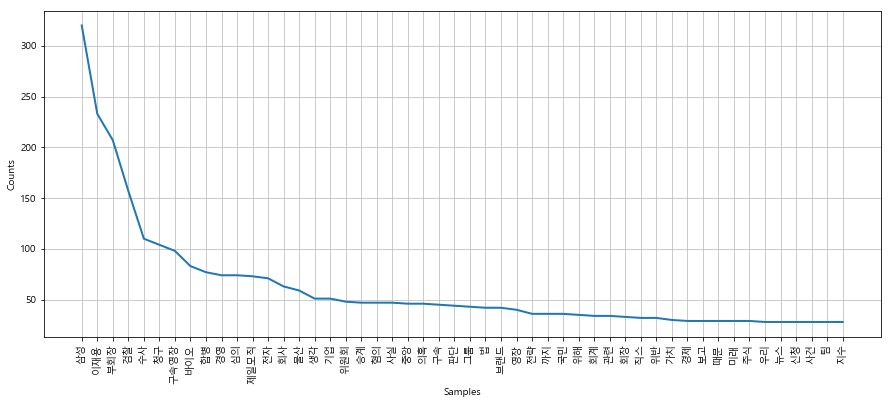

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [35]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [36]:
data = ko.vocab().most_common(300)

print(len(data))
data

300


[('삼성', 320),
 ('이재용', 233),
 ('부회장', 207),
 ('검찰', 157),
 ('수사', 110),
 ('청구', 104),
 ('구속영장', 98),
 ('바이오', 83),
 ('합병', 77),
 ('경영', 74),
 ('심의', 74),
 ('제일모직', 73),
 ('전자', 71),
 ('회사', 63),
 ('물산', 59),
 ('생각', 51),
 ('기업', 51),
 ('위원회', 48),
 ('승계', 47),
 ('혐의', 47),
 ('사실', 47),
 ('중앙', 46),
 ('의혹', 46),
 ('구속', 45),
 ('판단', 44),
 ('그룹', 43),
 ('법', 42),
 ('브랜드', 42),
 ('영장', 40),
 ('전략', 36),
 ('까지', 36),
 ('국민', 36),
 ('위해', 35),
 ('회계', 34),
 ('관련', 34),
 ('회장', 33),
 ('직스', 32),
 ('위반', 32),
 ('가치', 30),
 ('경제', 29),
 ('보고', 29),
 ('때문', 29),
 ('미래', 29),
 ('주식', 29),
 ('우리', 28),
 ('뉴스', 28),
 ('신청', 28),
 ('사건', 28),
 ('팀', 28),
 ('지수', 28),
 ('더', 27),
 ('하지', 27),
 ('평판', 26),
 ('있습니다', 25),
 ('저', 25),
 ('명', 25),
 ('사', 25),
 ('나', 25),
 ('이건희', 25),
 ('형', 25),
 ('한국', 24),
 ('투자', 24),
 ('분식회계', 24),
 ('입장', 24),
 ('피스', 24),
 ('오늘', 24),
 ('큰', 23),
 ('부터', 23),
 ('2015년', 23),
 ('상', 23),
 ('분석', 23),
 ('댓글', 23),
 ('되는', 22),
 ('여', 22),
 ('없는', 22),
 ('속', 22),
 

In [37]:
# list tuple을 딕셔너리로 만들어주는 함수
def todict(list_tuple):    
    todict = {}
    for i in range(0,len(list_tuple)):
        todict[data[i][0]] = data[i][1]
    return todict

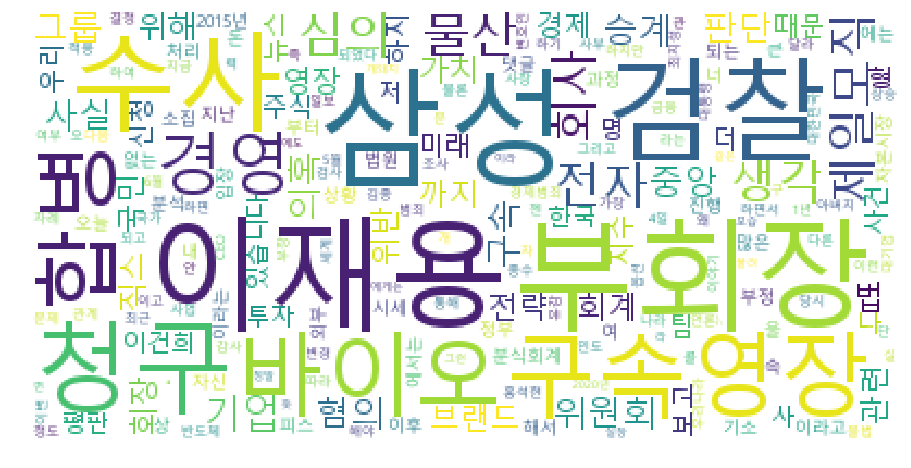

In [38]:
# 워드클라우드를 그려보자
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(todict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()